# RNN Twitter Disaster Classifier

## Imports

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import itertools
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow import keras

## Loading Data

In [3]:
#train = pd.read_csv('/content/drive/MyDrive/train_dist.csv')
#test = pd.read_csv('/content/drive/MyDrive/test_dist.csv')

In [ ]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')

## Exploratory Data Analysis (EDA)

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.shape

(7613, 5)

In [6]:
np.mean(train['target'])

0.4296597924602653

Text(0, 0.5, 'Count')

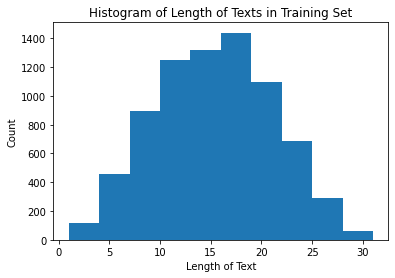

In [7]:
plt.hist([len(i.split()) for i in train['text']])
plt.title('Histogram of Length of Texts in Training Set')
plt.xlabel('Length of Text')
plt.ylabel('Count')

In [8]:
max(len(i.split()) for i in train['text'])

31

Text(0, 0.5, 'Count')

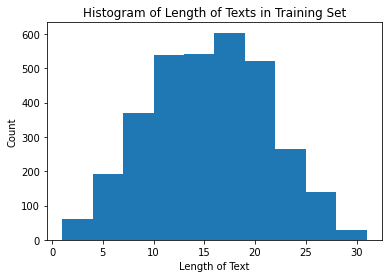

In [9]:
plt.hist([len(i.split()) for i in test['text']])
plt.title('Histogram of Length of Texts in Training Set')
plt.xlabel('Length of Text')
plt.ylabel('Count')

In [10]:
max(len(i.split()) for i in test['text'])

31

In [11]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
test.shape

(3263, 4)

## Modelling

Among the many design choices for implementation that ultimately did not lead to the best results were using stop words combined with TFIDF Vecotrizer to remove words that did not sufficiently appear. However when using reccurent neural networks, contextual meaning using all words as opposed to reducing to a subset led to better performance.  

In [16]:
encoder = tf.keras.layers.TextVectorization()
encoder.adapt(train['text'])

In [17]:
len(encoder.get_vocabulary())

22699

In [18]:
x = encoder(train['text']).numpy()

In [19]:
x.shape

(7613, 31)

In [20]:
max_review_length = x.shape[1]

In [21]:
y = train['target']

Test size as a hyperparameter was tuned with values from 0.1 to 0.5 tried with 0.3 achieving the best results.

In [22]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
## Try repeating below with more models and more hyperparameter tuning.

In [39]:
#Change below and run for various models to compare curves / results

embedding_vetcor_length = 4
input_dim = len(encoder.get_vocabulary())

# fix random seed for reproducibility
tf.random.set_seed(0)

model1 = Sequential()
model1.add(Embedding(input_dim, embedding_vetcor_length, input_length=max_review_length, mask_zero=True))
model1.add(GRU(4))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model1.fit(x_train, y_train, epochs=10, callbacks = [callback],
                    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 31, 4)             90796     
                                                                 
 gru_1 (GRU)                 (None, 4)                 120       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 90,921
Trainable params: 90,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
167/167 [==============================] - 11s 35ms/step - loss: 0.6828 - accuracy: 0.5603 - val_loss: 0.6646 - val_accuracy: 0.5858
Epoch 2/10
167/167 [==============================] - 4s 25ms/step - loss: 0.5836 - accuracy: 0.6938 - val_loss: 0.5019 - val_accuracy: 0.7877
Epoch 3/10
167/167 [=======

In [23]:
embedding_vetcor_length = 4
input_dim = len(encoder.get_vocabulary())

# fix random seed for reproducibility
tf.random.set_seed(0)

model = Sequential()
model.add(Embedding(input_dim, embedding_vetcor_length, input_length=max_review_length, mask_zero=True))
model.add(GRU(4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 4)             90796     
                                                                 
 gru (GRU)                   (None, 4)                 120       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 90,921
Trainable params: 90,921
Non-trainable params: 0
_________________________________________________________________


Many hyperparameters tuned to make sure that the model was not too large. Many think were tried including RNNs and LSTMs with more and fewer nodes as well as 

Same with below with regards to early stopping to avoid overfitting as it was fititing to training set too quickly.

In [25]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, callbacks = [callback],
                    validation_data=(x_val, y_val))

Epoch 1/10
167/167 [==============================] - 11s 36ms/step - loss: 0.6828 - accuracy: 0.5603 - val_loss: 0.6646 - val_accuracy: 0.5858
Epoch 2/10
167/167 [==============================] - 4s 25ms/step - loss: 0.5836 - accuracy: 0.6938 - val_loss: 0.5019 - val_accuracy: 0.7877
Epoch 3/10
167/167 [==============================] - 4s 26ms/step - loss: 0.3531 - accuracy: 0.8707 - val_loss: 0.4709 - val_accuracy: 0.7977
Epoch 4/10
167/167 [==============================] - 4s 26ms/step - loss: 0.2154 - accuracy: 0.9283 - val_loss: 0.5173 - val_accuracy: 0.7697
Epoch 5/10
167/167 [==============================] - 6s 36ms/step - loss: 0.1441 - accuracy: 0.9578 - val_loss: 0.5324 - val_accuracy: 0.7802
Epoch 6/10
167/167 [==============================] - 6s 38ms/step - loss: 0.0969 - accuracy: 0.9730 - val_loss: 0.6233 - val_accuracy: 0.7640


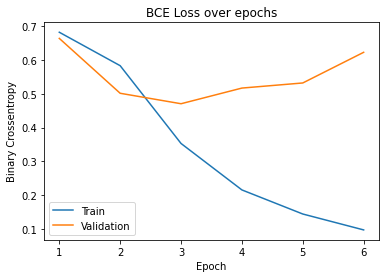

In [35]:
plt.plot(range(1,len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['loss']) + 1) , history.history['val_loss'])
plt.title('BCE Loss over epochs')
plt.ylabel('Binary Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

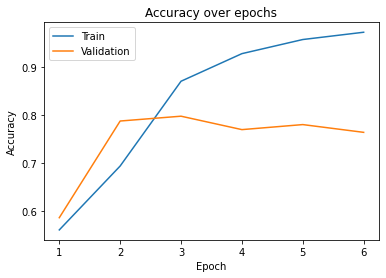

In [36]:
plt.plot(range(1,len(history.history['loss']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['loss']) + 1) , history.history['val_accuracy'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

As can be seen from the loss and accuracy curves, fitting to training continues to improve with so many parameters 

In [26]:
y_train.shape

(5329,)

In [27]:
test_vec = encoder(test['text']).numpy()

In [28]:
train_preds = np.round(model.predict(x))
train_preds = [int(i) for i in train_preds]

238/238 [==============================] - 3s 5ms/step


In [29]:
np.mean(train_preds == train['target'])

0.8899251280704059

In [30]:
np.mean(train_preds)

0.4020753973466439

In [ ]:
## Add confusion matrix to compare with validation to see where model struggles.

In [31]:
test_vec.shape

(3263, 31)

In [32]:
preds = np.round(model.predict(test_vec))
preds = [int(i) for i in preds]

102/102 [==============================] - 1s 6ms/step


In [33]:
np.mean(preds)

0.363162733680662

In [ ]:
sub = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
sub['target'] = preds
sub.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [ ]:
sub.to_csv('submission.csv', index=False)

## Results Summary

0.78455 accuracy was achieved on the test set upon submission of the above best model to Kaggle. This was the highest score achieved on the test set and is quite close to accuracy on the validation set.

However one issue persists in that training for 

Perhaps dropout layers could mitigate the overfitting or additional care in encoding 

When the model parameters were reduced substantially, there stil wasn't much improvement in out of sample loss and accuracy even if there was less overfitting on the training data.